In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import wrangle

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.



#### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.


#### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.



In [3]:
train, validate, test = wrangle.wrangle_zillow()
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,age
1219155,3,1.0,996,28116,1955,6037,67
543342,2,1.0,983,232817,1928,6037,94
1635508,4,2.0,1422,579000,1965,6059,57
1723313,3,2.5,1714,297912,1997,6111,25
1100678,3,2.0,1385,124672,1984,6037,38


In [4]:
train.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
fips                             object
age                               int64
dtype: object

<AxesSubplot:ylabel='Frequency'>

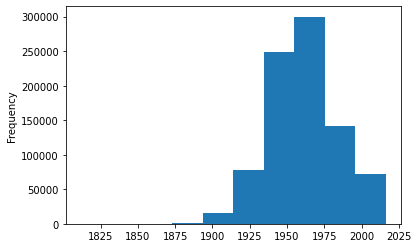

In [3]:
train.yearbuilt.plot.hist()

<AxesSubplot:ylabel='Frequency'>

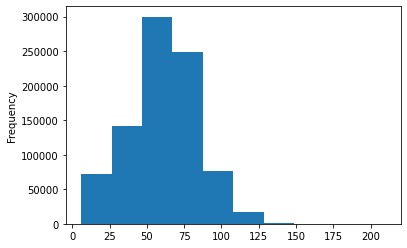

In [4]:
train.age.plot.hist()

Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856094 entries, 1219155 to 1652606
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bedroomcnt                    856094 non-null  Int64  
 1   bathroomcnt                   856094 non-null  Float64
 2   calculatedfinishedsquarefeet  856094 non-null  Int64  
 3   taxvaluedollarcnt             856094 non-null  Int64  
 4   yearbuilt                     856094 non-null  Int64  
 5   fips                          856094 non-null  int64  
 6   age                           856094 non-null  Int64  
dtypes: Float64(1), Int64(5), int64(1)
memory usage: 57.2 MB


At this point I ran into an issue that was too difficult to diagnose/troubleshoot involving lmplots trying to draw the regression line on my plots.  The cell below is an example.  To work past this I will not be drawing regression lines despite the question asking for it.

In [6]:
# train.bedroomcnt = train.bedroomcnt.astype(float)
# train.bathroomcnt = train.bathroomcnt.astype(float)

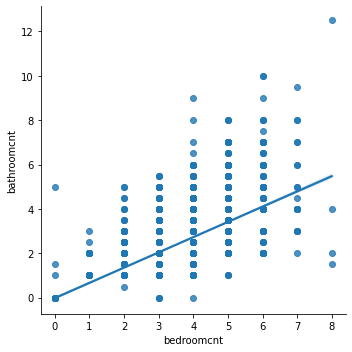

In [5]:
sns.lmplot(x = "bedroomcnt", y = "bathroomcnt", data = train.sample(10000))
# plt.show()

In [6]:
import itertools
cols = train.columns.tolist()
pairs = list(itertools.combinations(cols, 2))

In [7]:
def plot_variable_pairs(df):
    import itertools
    cols = df.columns.tolist()
    pairs = list(itertools.combinations(cols, 2))
    for pair in pairs:
        plt.scatter(df[pair[0]], df[pair[1]])
        plt.xlabel(pair[0])
        plt.ylabel(pair[1])
        plt.title(pair)
        plt.show()

In [34]:
pairs[0][0]

'bedroomcnt'

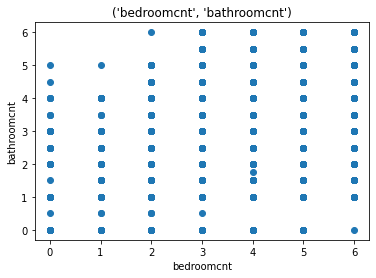

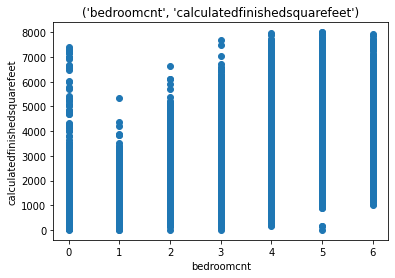

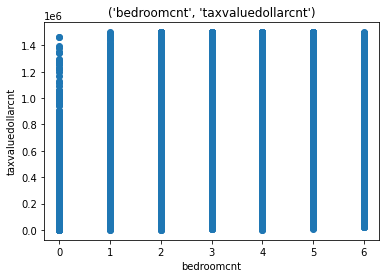

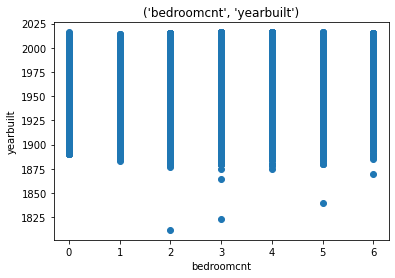

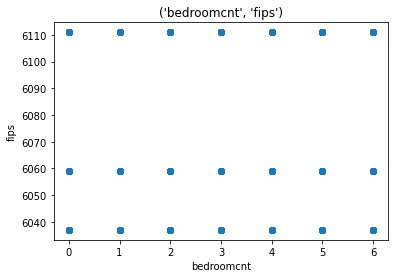

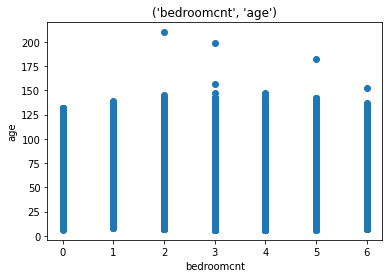

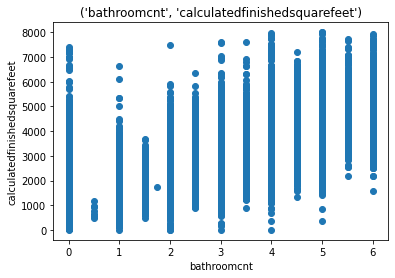

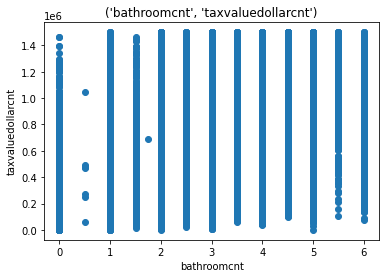

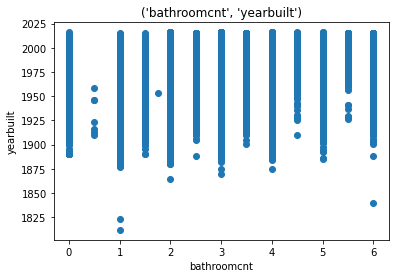

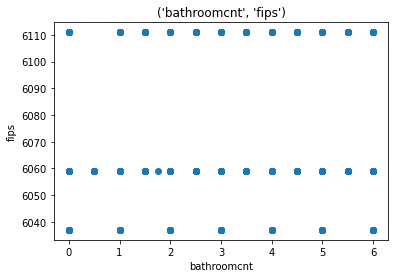

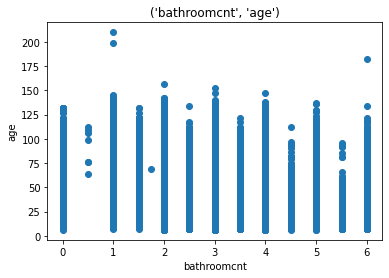

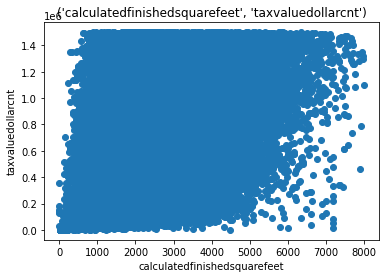

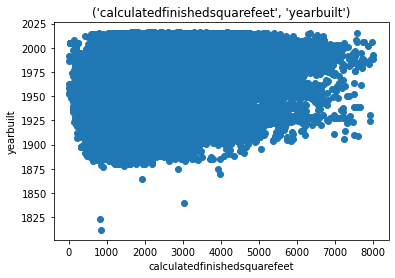

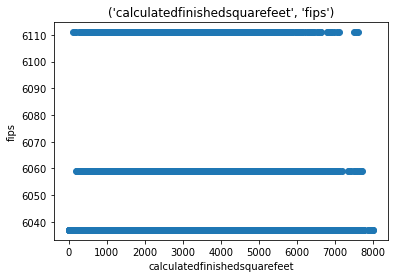

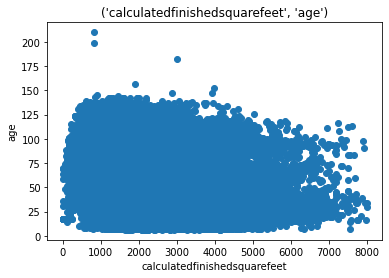

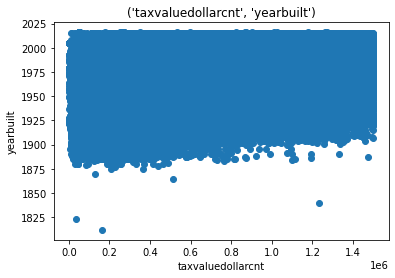

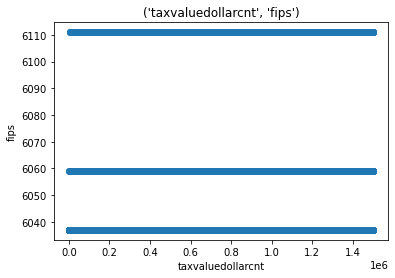

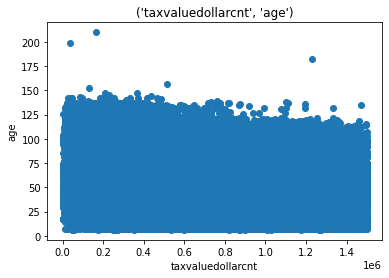

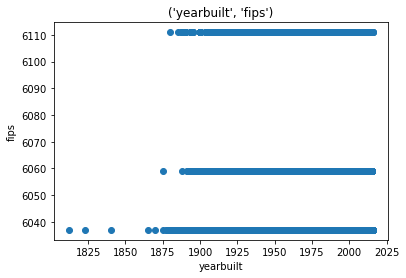

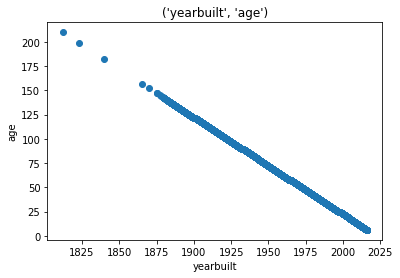

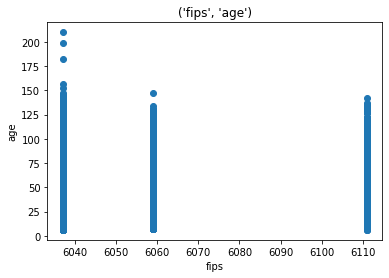

In [37]:
plot_variable_pairs(train)

In [39]:
train.calculatedfinishedsquarefeet.nsmallest(10)

1359288     1
1046787     1
1276353     1
1963976     3
402516      3
584383      3
1615022    20
527473     20
1937466    20
1937497    20
Name: calculatedfinishedsquarefeet, dtype: Int64

In [40]:
train.fillna(0)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,age
1219155,3,1.0,996,28116,1955,6037,67
543342,2,1.0,983,232817,1928,6037,94
1635508,4,2.0,1422,579000,1965,6059,57
1723313,3,2.5,1714,297912,1997,6111,25
1100678,3,2.0,1385,124672,1984,6037,38
...,...,...,...,...,...,...,...
237859,3,2.0,1593,87967,1955,6037,67
232987,4,3.0,2146,328836,1979,6037,43
785237,3,1.0,1089,263603,1957,6059,65
1608215,3,2.0,1647,1233528,1924,6037,98


Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



In [7]:
def plot_categorical_and_continuous_vars(df, categorical_cols, continuous_cols):
    if len(df) > 100_000:
        df = df.sample(100_000)
    for con in continuous_cols:
        fig, ax = plt.subplots(nrows=len(categorical_cols), ncols=3)
        for i, cat in enumerate(categorical_cols):
            sns.barplot(data=df, x=cat, y=con, ax=ax[i][0])
            sns.boxplot(data=df, x=cat, y=con, ax=ax[i][1])
            sns.violinplot(data=df, x=cat, y=con, ax=ax[i][2])
    fig.show()


In [8]:
import math
def year_to_decade_name(year: int) -> str:
    decade = math.floor(int(year) / 10) * 10
    return f"{decade}s"
year_to_decade_name(1988)

'1980s'

In [9]:
train['decade'] = train.yearbuilt.apply(year_to_decade_name)

In [10]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,age,decade
1219155,3,1.0,996,28116,1955,6037,67,1950s
543342,2,1.0,983,232817,1928,6037,94,1920s
1635508,4,2.0,1422,579000,1965,6059,57,1960s
1723313,3,2.5,1714,297912,1997,6111,25,1990s
1100678,3,2.0,1385,124672,1984,6037,38,1980s


In [11]:
train.columns.tolist()
continuous = [
    'bedroomcnt',
    'bathroomcnt',
    'calculatedfinishedsquarefeet',
    'taxvaluedollarcnt',
    'age']

categorical = [
    'fips',
    'decade']

In [18]:
fix = pd.DataFrame(train.to_dict())
print(train.dtypes)
print(fix.dtypes)

bedroomcnt                        Int64
bathroomcnt                     Float64
calculatedfinishedsquarefeet      Int64
taxvaluedollarcnt                 Int64
yearbuilt                         Int64
fips                              int64
age                               Int64
decade                           object
dtype: object
bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
fips                              int64
age                               int64
decade                           object
dtype: object


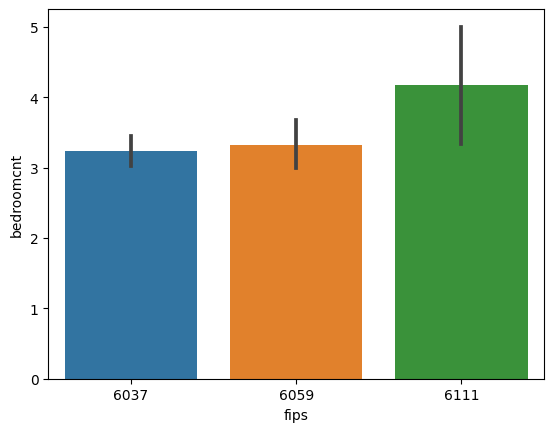

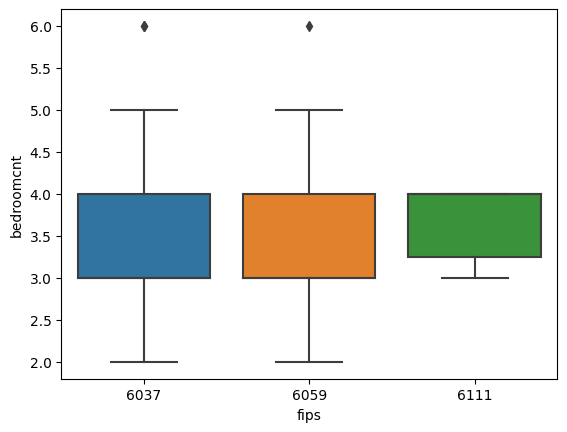

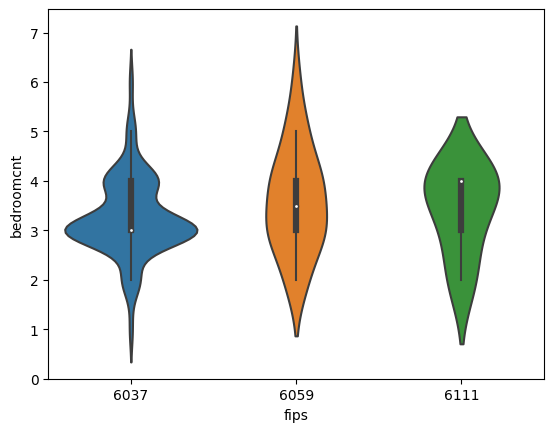

In [25]:
ax = sns.barplot(data=train.sample(100), x='fips', y='bedroomcnt')
plt.show()
sns.boxplot(data=train.sample(100), x='fips', y='bedroomcnt')
plt.show()
sns.violinplot(data=train.sample(100), x='fips', y='bedroomcnt')
plt.show()

In [13]:
train['decade'].sort_values().unique().tolist()

['1810s',
 '1820s',
 '1840s',
 '1860s',
 '1870s',
 '1880s',
 '1890s',
 '1900s',
 '1910s',
 '1920s',
 '1930s',
 '1940s',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '2000s',
 '2010s']

In [26]:
def plot_categorical_and_continuous_vars(df, categorical_cols, continuous_cols):
    """Spits out a bunch of plots to speed up exploration."""
    # Save ourselves some time on huge datasets
    if len(df) > 200_000:
        df = df.sample(200_000)
    
    # Some quickmaths to determine each figure size.
    units = 4
    width = 3*units
    height = len(categorical_cols)*units-1

    # Make a new subplots figure for each continuous variable
    for con in continuous_cols:
        fig, ax = plt.subplots(nrows=len(categorical_cols), ncols=3, figsize=(width,height))

        # Make a row consisting of a bar, box, and violin plot for each categorical variable
        for row, cat in enumerate(categorical_cols):
            # For readability, get a sorted list of each categorical bucket
            sort_order = df[cat].sort_values().unique().tolist()

            plot1 = sns.barplot(data=df, x=cat, y=con, ax=ax[row][0], order=sort_order)
            plot1.set_ylabel(cat)   # Only the leftmost plot gets a ylabel, labeling the entire row (not the y axis!)
            plot1.set_xlabel(None)  # Remove the xlabel, that goes in the ylabel
            # Rotate xtick labels so that they can't overlap each other.
            for item in plot1.get_xticklabels():
                item.set_rotation(90)
            
            plot2 = sns.boxplot(data=df, x=cat, y=con, ax=ax[row][1], order=sort_order)
            plot2.set_ylabel(None)
            plot2.set_xlabel(None)
            for item in plot2.get_xticklabels():
                item.set_rotation(90)
            
            plot3 = sns.violinplot(data=df, x=cat, y=con, ax=ax[row][2], order=sort_order)
            plot3.set_ylabel(None)
            plot3.set_xlabel(None)
            for item in plot3.get_xticklabels():
                item.set_rotation(90)
        # Title the figure with the continuous variable so we know what we are looking at.
        fig.suptitle(con)


In [17]:
continuous = [
    'bedroomcnt',
    'bathroomcnt',
    'calculatedfinishedsquarefeet',
    'taxvaluedollarcnt',
    'age']

categorical = [
    'fips',
    'decade']

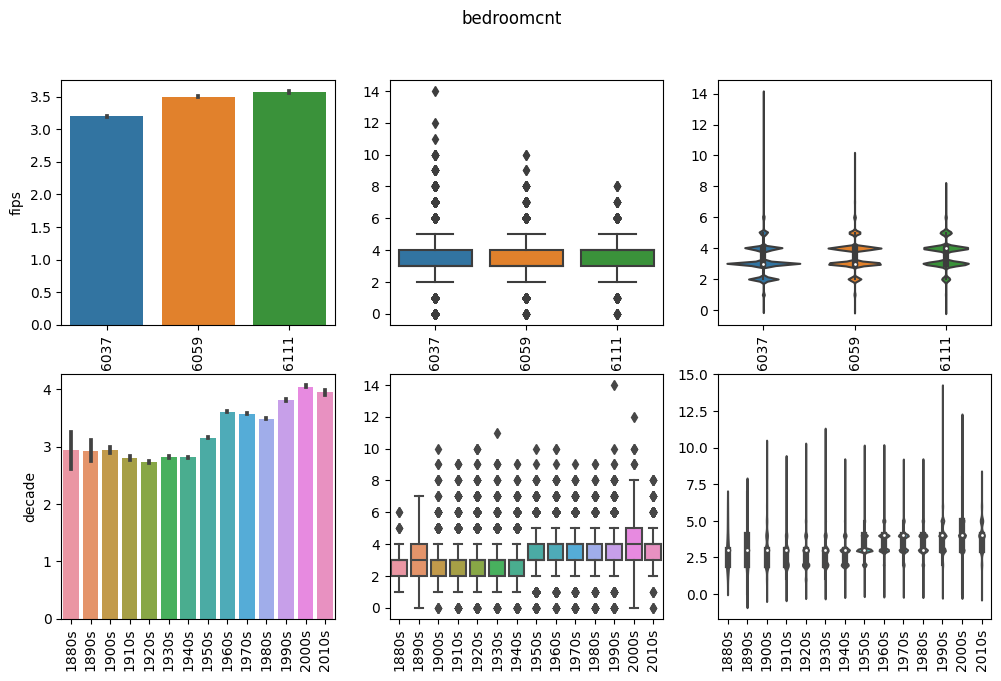

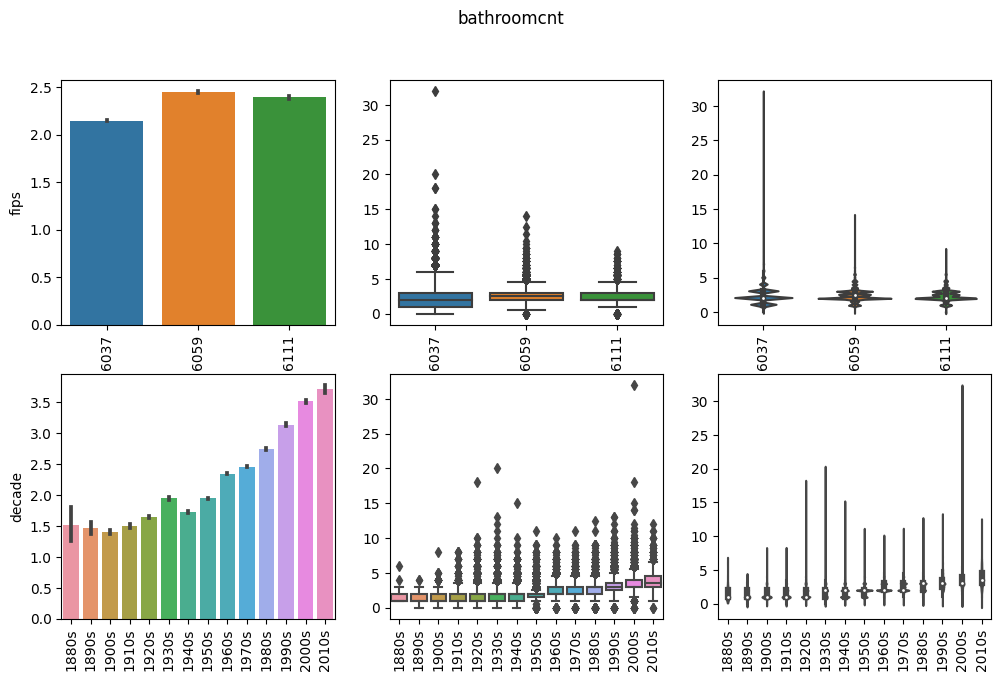

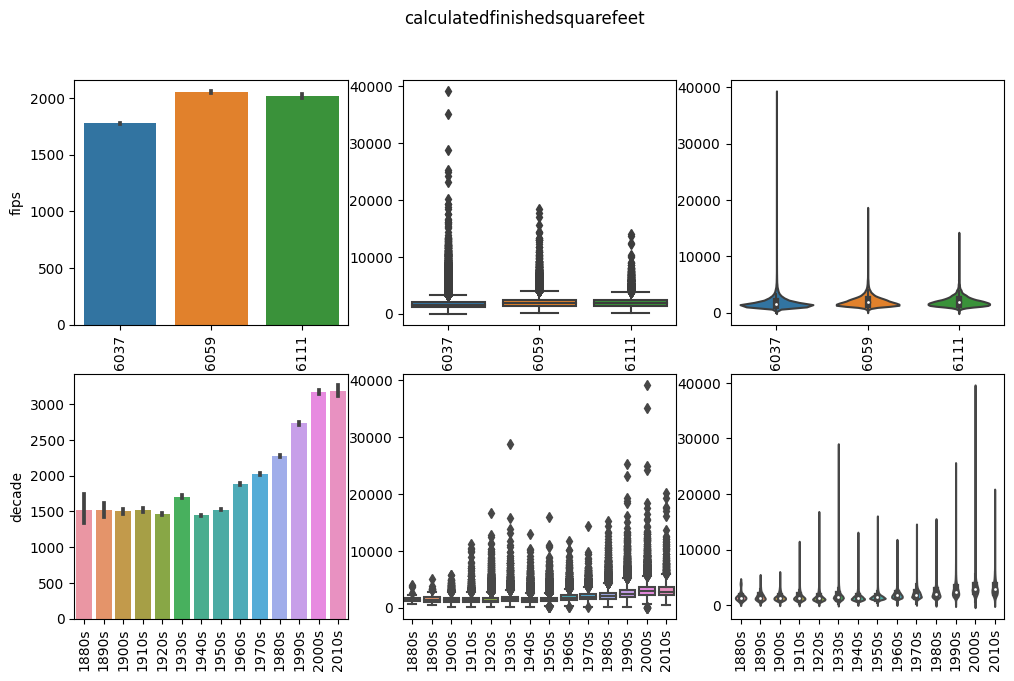

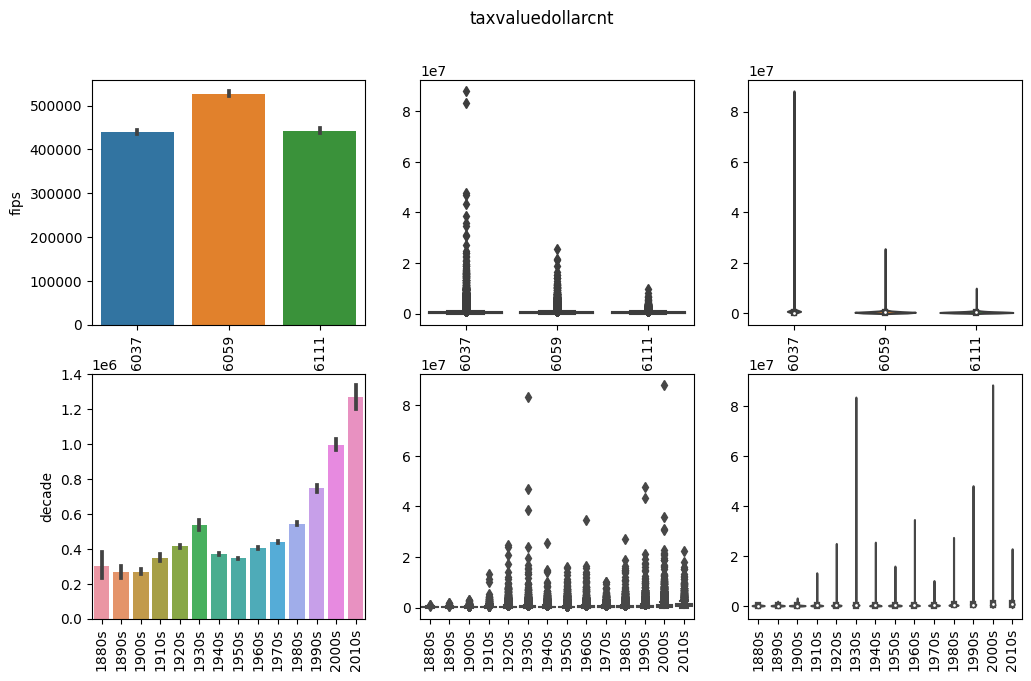

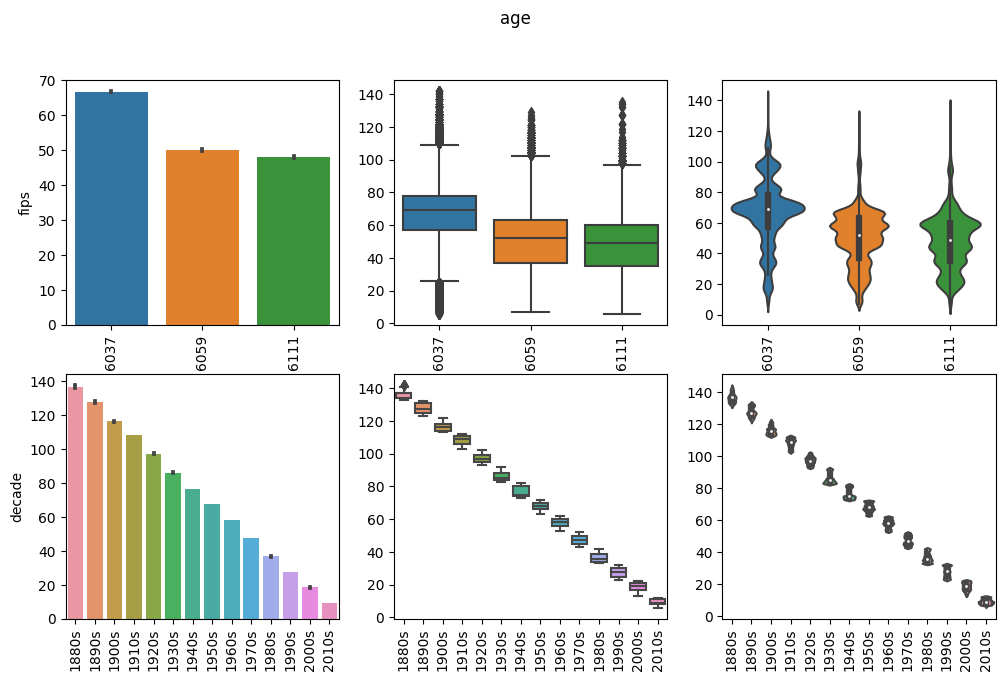

In [27]:
plot_categorical_and_continuous_vars(train, categorical, continuous)

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.



In [4]:
train, _, __ = wrangle.wrangle_zillow()


In [6]:
train.bedroomcnt.name

'bedroomcnt'

Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.



Come up with some initial hypotheses based on your goal of predicting property value.



Visualize all combinations of variables in some way.



Run the appropriate statistical tests where needed.



What independent variables are correlated with the dependent variable, home value?



Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?



Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.



Explore your dataset with any other visualizations you think will be helpful.